# Modeling wine quality based on  physicochemical tests

## Exploratory Analysis

In [56]:
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import metrics

In [57]:
# Read the csv file into pandas dataframe
white_wines = pd.read_csv('winequality/winequality-white.csv')
print(white_wines.shape)
white_wines.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [58]:
# Check null values
white_wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [59]:
# Descriptive statistics
white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


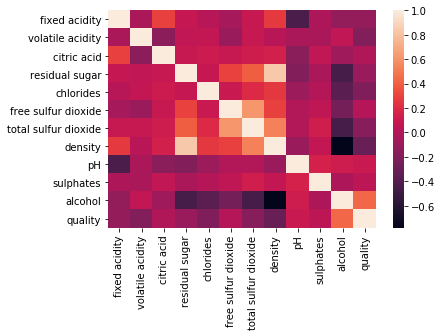

In [60]:
# Correlations
sns.heatmap(white_wines.corr())

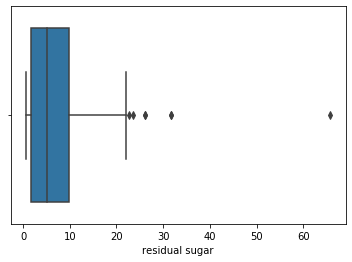

In [61]:
# One outlier example
sns.boxplot(white_wines['residual sugar'])

In [62]:
# Get z scores
z = np.abs(stats.zscore(white_wines))
print(z)

[[1.72096961e-01 8.17699008e-02 2.13280202e-01 ... 3.49184257e-01
  1.39315246e+00 1.37870140e-01]
 [6.57501128e-01 2.15895632e-01 4.80011213e-02 ... 1.34184656e-03
  8.24275678e-01 1.37870140e-01]
 [1.47575110e+00 1.74519434e-02 5.43838363e-01 ... 4.36815783e-01
  3.36667007e-01 1.37870140e-01]
 ...
 [4.20473102e-01 3.79435433e-01 1.19159198e+00 ... 2.61552731e-01
  9.05543789e-01 1.37870140e-01]
 [1.60561323e+00 1.16673788e-01 2.82557040e-01 ... 9.62604939e-01
  1.85757201e+00 1.26711420e+00]
 [1.01304317e+00 6.77100966e-01 3.78559282e-01 ... 1.48839409e+00
  1.04489089e+00 1.37870140e-01]]


In [63]:
# Drop columns below z=3 treshold
white_wines = white_wines[(z < 3).all(axis=1)]
white_wines.shape

(4487, 12)

In [64]:
# Descriptive statistics
white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000
mean,6.839570,0.271365,0.326410,6.416503,0.043169,34.855471,137.607087,0.993967,3.188043,0.485538,10.537463,5.915311
std,0.786279,0.086109,0.101101,4.953728,0.011709,15.417406,41.281527,0.002908,0.143446,0.105856,1.225441,0.854014
min,4.400000,0.080000,0.000000,0.600000,0.012000,2.000000,21.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.775000,0.035000,23.000000,108.000000,0.991680,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.043000,34.000000,133.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,45.000000,166.000000,0.996100,3.280000,0.540000,11.400000,6.000000
max,9.300000,0.580000,0.690000,20.800000,0.110000,86.000000,260.000000,1.001960,3.640000,0.830000,14.200000,8.000000


In [65]:
white_wines['quality'].value_counts()

6    2038
5    1309
7     855
8     161
4     124
Name: quality, dtype: int64

### Data preprocessing

In [66]:
# Define features X
X = np.asarray(white_wines.iloc[:,:-1])
X[0:5]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]])

In [67]:
# Define target y
y = np.asarray(white_wines['quality'])
y[0:5]

array([6, 6, 6, 6, 6], dtype=int64)

In [68]:
# Nomalize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.20405985, -0.01585446,  0.33228199,  2.8837046 ,  0.15636646,
         0.65806528,  0.78477047,  2.41896215, -1.3110488 , -0.33575895,
        -1.41798425],
       [-0.68630841,  0.33258131,  0.1344384 , -0.97240702,  0.49803497,
        -1.35287326, -0.13584071,  0.01124404,  0.78056932,  0.04215411,
        -0.84669787],
       [ 1.60320999,  0.1002908 ,  0.72796916,  0.09761348,  0.5834521 ,
        -0.3149695 , -0.98377206,  0.38959974,  0.5016869 , -0.43023721,
        -0.35702383],
       [ 0.45845079, -0.48043549, -0.06340519,  0.42063854,  1.26678914,
         0.78780325,  1.17239622,  0.56157961,  0.01364268, -0.80815027,
        -0.52024851],
       [ 0.45845079, -0.48043549, -0.06340519,  0.42063854,  1.26678914,
         0.78780325,  1.17239622,  0.56157961,  0.01364268, -0.80815027,
        -0.52024851]])

## Validation and Model Selection

### Train/Test Dataset

In [69]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3589, 11) (3589,)
Test set: (898, 11) (898,)


### K-Nearest Neighbor

In [94]:
# Train model and predict
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

501 / 898 correct


In [95]:
from sklearn.metrics import accuracy_score

# test set accuracy
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))

accuracy = cross_val_score(knn, X, y, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())

accuracy = cross_val_score(knn, X, y, scoring = 'roc_auc_ovo',cv=10)
print('cross validation score with roc_auc',accuracy.mean())

print('roc_auc_score',roc_auc_score(y_test,knn.predict_proba(X_test), multi_class='ovo'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        27
           5      0.576     0.544     0.560       270
           6      0.558     0.698     0.621       411
           7      0.519     0.401     0.453       167
           8      1.000     0.000     0.000        23

    accuracy                          0.558       898
   macro avg      0.731     0.329     0.327       898
weighted avg      0.581     0.558     0.537       898

cross validation score 0.5168365216353801
cross validation score with roc_auc 0.7048614460950307
roc_auc_score 0.7848417307280429


#### KNN accuracy plot

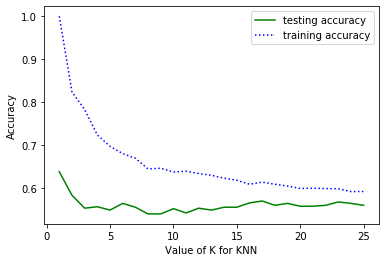

In [72]:
%matplotlib inline

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

scores_training = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    scores_training.append(accuracy_score(y_train, y_pred))

plt.plot(k_range, scores, '-g', label='testing accuracy')
plt.plot(k_range, scores_training, ':b', label='training accuracy')

plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()

#### Cross Validation for KNN

In [73]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 26)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated accuracy')

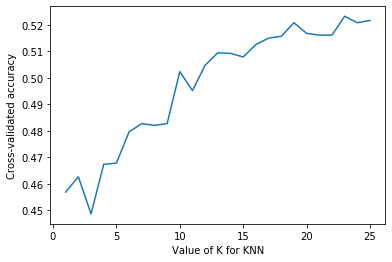

In [74]:
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))
print('accuracy',accuracy_score(y_test, y_pred))

accuracy = cross_val_score(logreg, X, y, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())

accuracy = cross_val_score(logreg, X, y, scoring = 'roc_auc_ovo',cv=10)
print('cross validation score with roc_auc',accuracy.mean())

print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(X_test), multi_class='ovo'))

C:\Users\Gulden\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           4      0.000     0.000     0.000        27
           5      0.580     0.470     0.519       270
           6      0.513     0.745     0.608       411
           7      0.458     0.228     0.304       167
           8      0.000     0.000     0.000        23

    accuracy                          0.524       898
   macro avg      0.310     0.288     0.286       898
weighted avg      0.494     0.524     0.491       898

accuracy 0.5244988864142539
cross validation score 0.5290988903913459
cross validation score with roc_auc 0.743035175344158
roc_auc_score 0.7539346288714028


#### Adding polynomial features to the logistic regression

In [96]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(multi_class='multinomial',solver ='newton-cg', **kwargs))

#### Bias vs. Variance Tradeoff for Logistic Regression with Polynomial Features

In [97]:
def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

In [98]:
degree = np.arange(0, 5)
val_train, val_test = validation_curve(PolynomialRegression(), X, y,
                                       'polynomialfeatures__degree', degree, cv=10,
                                       scoring=rms_error)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)


plot_with_err(degree, val_train, label='training scores')
plot_with_err(degree, val_test, label='validation scores')
plt.xlabel('degree'); plt.ylabel('rms error')
plt.legend()

C:\Users\Gulden\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (4038,11) into shape (4038,0)

  FitFailedWarning)


KeyboardInterrupt: 

In [ ]:
poly = PolynomialRegression(2)
poly.fit(X_train,y_train)
y_pred = poly.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))

accuracy = cross_val_score(poly, X, y,cv=10)
print('mean accuracy',accuracy.mean())
print(mean_squared_error(y_test, y_pred))

accuracy = cross_val_score(poly, X, y, scoring = 'roc_auc_ovo',cv=10)
print('cross validation score',accuracy.mean())
print('roc_auc_score',roc_auc_score(y_test,poly.predict_proba(X_test), multi_class='ovo'))

In [55]:
poly = PolynomialRegression(3)
poly.fit(X_train,y_train)
y_pred = poly.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))

accuracy = cross_val_score(poly, X, y,cv=10)
print('mean accuracy',accuracy.mean())
print(mean_squared_error(y_test, y_pred))

accuracy = cross_val_score(poly, X, y, scoring = 'roc_auc_ovo',cv=10)
print('cross validation score',accuracy.mean())
print('roc_auc_score',roc_auc_score(y_test,poly.predict_proba(X_test), multi_class='ovo'))

              precision    recall  f1-score   support

           4      0.348     0.296     0.320        27
           5      0.615     0.515     0.560       270
           6      0.571     0.669     0.616       411
           7      0.496     0.401     0.444       167
           8      0.344     0.478     0.400        23

    accuracy                          0.557       898
   macro avg      0.475     0.472     0.468       898
weighted avg      0.558     0.557     0.553       898



KeyboardInterrupt: 

### Decision Tree

In [33]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(metrics.classification_report(y_test, y_pred.round(), digits=3))

accuracy = cross_val_score(tree, X, y,cv=10)
print(accuracy.mean())


accuracy = cross_val_score(tree, X, y,scoring = 'roc_auc_ovo',cv=10)
print('cross validation score',accuracy.mean())
print('roc_auc_score',roc_auc_score(y_test,tree.predict_proba(X_test), multi_class='ovo'))


              precision    recall  f1-score   support

           4      0.429     0.333     0.375        27
           5      0.662     0.589     0.624       270
           6      0.659     0.672     0.665       411
           7      0.570     0.611     0.590       167
           8      0.308     0.522     0.387        23

    accuracy                          0.621       898
   macro avg      0.525     0.545     0.528       898
weighted avg      0.627     0.621     0.623       898

0.42347478523703463
cross validation score 0.5670115885877957
roc_auc_score 0.7157840803107632


### Random Forest

In [35]:
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

accuracy = cross_val_score(forest, X, y,cv=10)
print('mean accuract',accuracy.mean())

accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovo',cv=10)
print('cross validation score',accuracy.mean())
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovo'))

              precision    recall  f1-score   support

           4      0.714     0.185     0.294        27
           5      0.742     0.670     0.704       270
           6      0.662     0.815     0.731       411
           7      0.679     0.533     0.597       167
           8      1.000     0.435     0.606        23

    accuracy                          0.690       898
   macro avg      0.760     0.528     0.586       898
weighted avg      0.699     0.690     0.682       898

mean accuract 0.5391420418390073
cross validation score 0.7555847734815174
roc_auc_score 0.8894645580061111
